# How do neural networks learn?

We have seen how you can prepare some data with features ``X`` and labels ``y``. Then we can define the architecture/structure of a multi-layer perceptron (MLP) and randomly initialise a collection of weights ``w`` and biases ``b`` for the different neurons and layers of our MLP. We can then feed our training data through our MLP to get predictions of our class labels.

$X_{i} \to MLP(w, b) \to Prediction_{i}$

We have also seen that we can measure our sum of square errors by adding up the squared difference between each prediction and the corresponding observation (i.e. the correct answer). This sum will be ``0`` if our predictions are all correct and will get larger as more of our guesses are wrong. 

$Predictions, Observations \to Error$

## Tuning our weights and biases

We saw that randomly initialising the weights and biases was unlikely to lead to good predictions. We want to tune our weights and biases in a way that reduces our error.

The error is a function of our predictions and our observations. Our predictions are a function of our weights and biases. These statements together imply that our error is implicitly a function of our weights and biases. In other words:

*Changing your weights and biases in your MLP will change your error.*

For fixed data and network structure, we can try to understand how we can change our weights and biases to reduce our error.

## Gradient Descent in 1D

In [1]:
def LinearFunc(x, weight, bias):
    """
    Linear function: y = weight * x + bias
    """
    return weight * x + bias

import math
# Generate some sample data
x = [i for i in range(10)]
y = [math.sin(i) for i in x]

def SSE(x, y, weight, bias):
    """
    Calculate the sum of squared errors (SSE) for a linear model.
    """
    return sum((y[i] - LinearFunc(x[i], weight, bias)) ** 2 for i in range(len(y)))

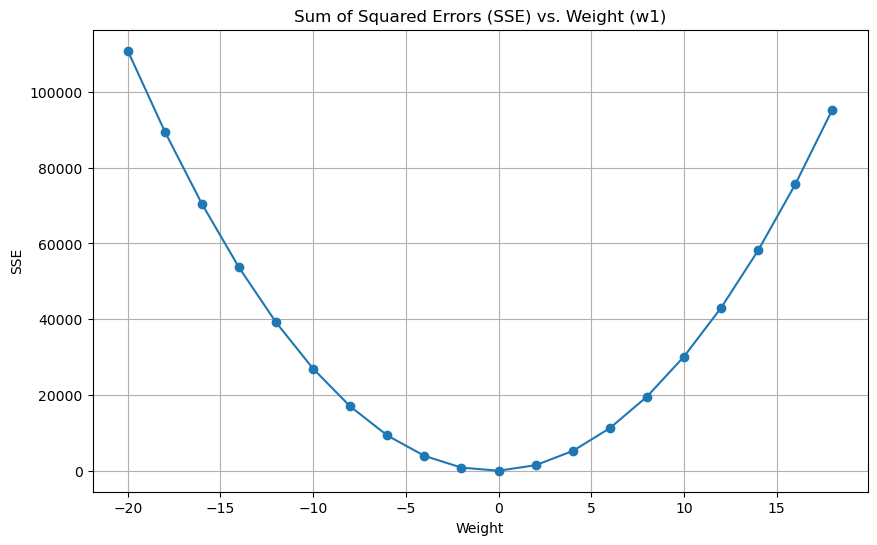

In [2]:
# Fix the bias but vary the weight
bias = 2

ErrorDict = {}
for weight in range(-20, 20, 2):
    sse = SSE(x, y, weight, bias)
    ErrorDict[weight] = sse

# Plot the error curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ErrorDict.keys(), ErrorDict.values(), marker='o')
plt.title('Sum of Squared Errors (SSE) vs. Weight (w1)')
plt.xlabel('Weight')
plt.ylabel('SSE')
plt.grid()
plt.show()

We can see for different weight values, there is a different error value. Accurate prediction is as simple as minimising the error with respect to the weights and biases.

In a calculus class you might have taken the derivative of a function $\frac{dError}{dWeight}$, which represents the slope/gradient of the error function with respect to the weight at a given position. 

Whilst you could in theory solve for when the derivative/slope is zero, to find an explicit answer in situations where there are a large number of weights and biases is often intractably difficult.

Instead, we understand that if the derivative is positive when the slope is upwards and negative when the slope is downwards, we can just head in the opposite direction of the derivative.

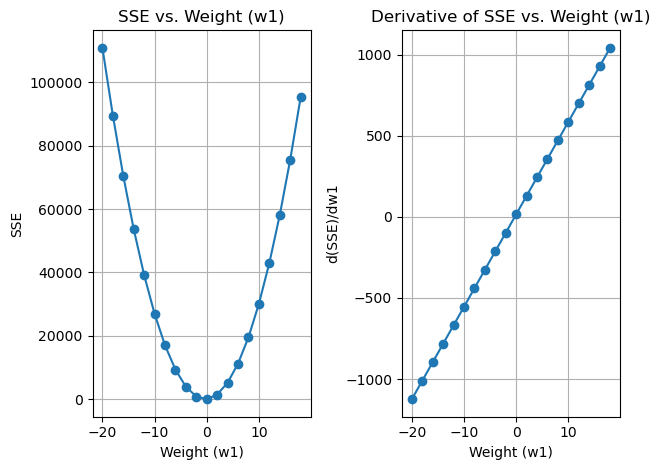

In [ ]:
def DerivativeSSE(x, y, weight, bias):
    """
    Calculate the derivative of SSE with respect to weight.
    """
    return -2 * sum((y[i] - LinearFunc(x[i], weight, bias)) * x[i] for i in range(len(y))) / len(y)

# Create subplots
fig, axes = plt.subplots(1, 2)

# Plot SSE
axes[0].plot(ErrorDict.keys(), ErrorDict.values(), marker='o')
axes[0].set_title('SSE vs. Weight (w1)')
axes[0].set_xlabel('Weight (w1)')
axes[0].set_ylabel('SSE')
axes[0].grid(True)

# Plot Derivative of SSE
axes[1].plot(ErrorDict.keys(), [DerivativeSSE(x, y, weight, bias) for weight in ErrorDict.keys()], marker='o')
axes[1].set_title('Derivative of SSE vs. Weight (w1)')
axes[1].set_xlabel('Weight (w1)')
axes[1].set_ylabel('d(SSE)/dw1')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Make wider Huw!

Consider the above left plot and choose a position on the x-axis and look at its corresponding SSE value. You can intuitively see which way is "downhill". 

On the above right plot you should be able to read off the derivative at the same x-axis value. If the left plot shows you're facing uphill, the derivative should be positive on the right plot. If you're facing downhill the derivative should be negative. The larger the value of the derivative, the steeper the slope.

It make sense then that we should take a step in the direction of the negative of the gradient. You should take a larger step if the value of the derivative is larger. 

In practise we take a step size proportional to the derivative. We call the constant of proportionality the *learning rate*. If the learning rate is too large we might step over a minimum. If the rate is too small then we might take too long to find the minimum!

The process of taking small steps downhill by varying our weights is called *Gradient Descent*.

## Gradient Descent in Higher Dimensions

In practise, we want to update all the weights and biases of our neural network at once. This means we want to use a generalisation of the derivative called the gradient function. Given a function $f$ of $n$ variables: $w_{1}, w_{2}, \ldots, w_{n}$ we can define the gradient function of $f$ as:

$\nabla f (w_{1}, \ldots, w_{n}) = \begin{bmatrix}
           \frac{\partial f}{\partial w_{1}} \\
           \frac{\partial f}{\partial w_{2}} \\
           \vdots \\
           \frac{\partial f}{\partial w_{n}}
         \end{bmatrix}  $

where $\frac{\partial f}{\partial w_{1}}$ is the *partial derivative* of the function $f$ with respect to $w_{1}$. What this means is that each component of this vector tells you how steep the function $f$ is with respect to each of its variables.

Now if we imagine a loss surface (like a mountain range where the height of where you are standing is the value of a loss function) then we just want to walk downhill with respect to all of our components. This direction is described by the gradient vector.

In practise the step we take is proportional to the size of the gradient. We will define a variable called the *learning rate*, which will tell us how big of a step to take downhill each time.

You can play around with this web app to see how the loss surface "looks" with respect to a function and see how gradient descent moves you downhill towards minimal loss 

https://neuralpatterns.io/hill_climber.html